In [3]:
from ContrarianBT import ContrarianBT as BT

In [4]:
tester = BT(symbol="EURUSD=X", start = "2018-01-01",end = "2019-12-31", window=3, leverage=7, quantile=0.9, quantile_window=3 )

[*********************100%%**********************]  1 of 1 completed


## Test methods and instantiation

In [5]:
tester.data.head()

,Price,returns,lev_returns,window
Date,,,,
2018-01-01,1.200495,NaN,NaN,NaN
2018-01-02,1.201158,0.000552,0.003860,NaN
2018-01-03,1.206345,0.004309,0.029783,1.202666
2018-01-04,1.201043,-0.004406,-0.031254,1.202849
2018-01-05,1.206884,0.004852,0.033479,1.204757


In [6]:
tester.backtest()

Strategy Net performance: 1.0 || Strategy outperformance vs Buy and Hold: 0.073


In [7]:
tester.result

,Price,returns,lev_returns,window,pc_direction,mag_pricechange,mag_pcquantile,positions,trades,creturns,clev_returns,strategy,strategy_net,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,,,
2018-01-04,1.201043,-0.004406,-0.031254,1.202849,1.0,0.003089,0.004380,-0.0,0.0,0.995604,0.969229,NaN,NaN,NaN,NaN
2018-01-05,1.206884,0.004852,0.033479,1.204757,1.0,0.004526,0.004770,-0.0,0.0,1.000446,1.002227,-0.0,-0.0,1.0,1.0
2018-01-08,1.203746,-0.002603,-0.018368,1.203891,-1.0,0.003953,0.004770,0.0,0.0,0.997845,0.983986,0.0,0.0,1.0,1.0
2018-01-09,1.197046,-0.005582,-0.039743,1.202559,-1.0,0.004343,0.005426,0.0,0.0,0.992291,0.945646,-0.0,-0.0,1.0,1.0
2018-01-10,1.192933,-0.003442,-0.024343,1.197908,-1.0,0.003867,0.005140,0.0,0.0,0.988882,0.922904,-0.0,-0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.109385,0.001264,0.008814,1.109988,-1.0,0.002103,0.003568,0.0,0.0,0.919625,0.471123,0.0,0.0,1.0,1.0
2019-12-25,1.109016,-0.000333,-0.002331,1.108795,-1.0,0.001914,0.003568,0.0,0.0,0.919319,0.470026,-0.0,-0.0,1.0,1.0
2019-12-26,1.109545,0.000477,0.003335,1.109316,1.0,0.000692,0.001107,-0.0,0.0,0.919758,0.471596,0.0,0.0,1.0,1.0


In [8]:
tester.result.mag_pricechange.max()

0.009343852524423121

In [9]:
tester.result.mag_pricechange.min()

0.00021930409281593435

In [10]:
tester.result.mag_pricechange.mean() #average magntude

0.002979656363487921

In [11]:
tester.result.trades.value_counts()

trades
0.0    517
Name: count, dtype: int64

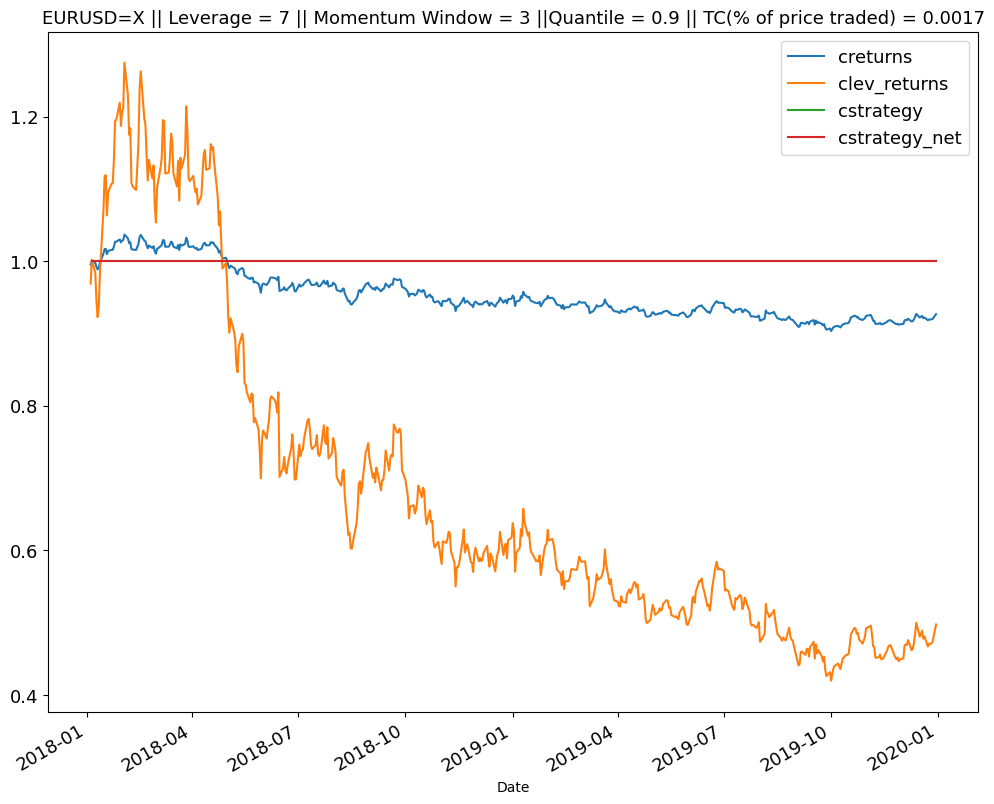

In [12]:
tester.plot_data()

## Test optimisation

In [13]:
tester.optimise_strategy(window_range=5,quantile_window_range=10,qrange = (0.6,1.0,5,False), leverage_range=(2,5))

1000
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Optimal Window : 4 || Quantile Window: 7 ||Quantile : 0.6 || Leverage = 2 || Performance : 1.7061


In [25]:
tester.set_parameters(4,7,0.6,leverage=2)

In [26]:
print(tester)

MomentumBT: EURUSD=X, window = 4,quantile_window =7, quantile = 0.6, leverage = 2


In [27]:
tester.backtest()

Strategy Net performance: 0.9889 || Strategy outperformance vs Buy and Hold: 0.0548


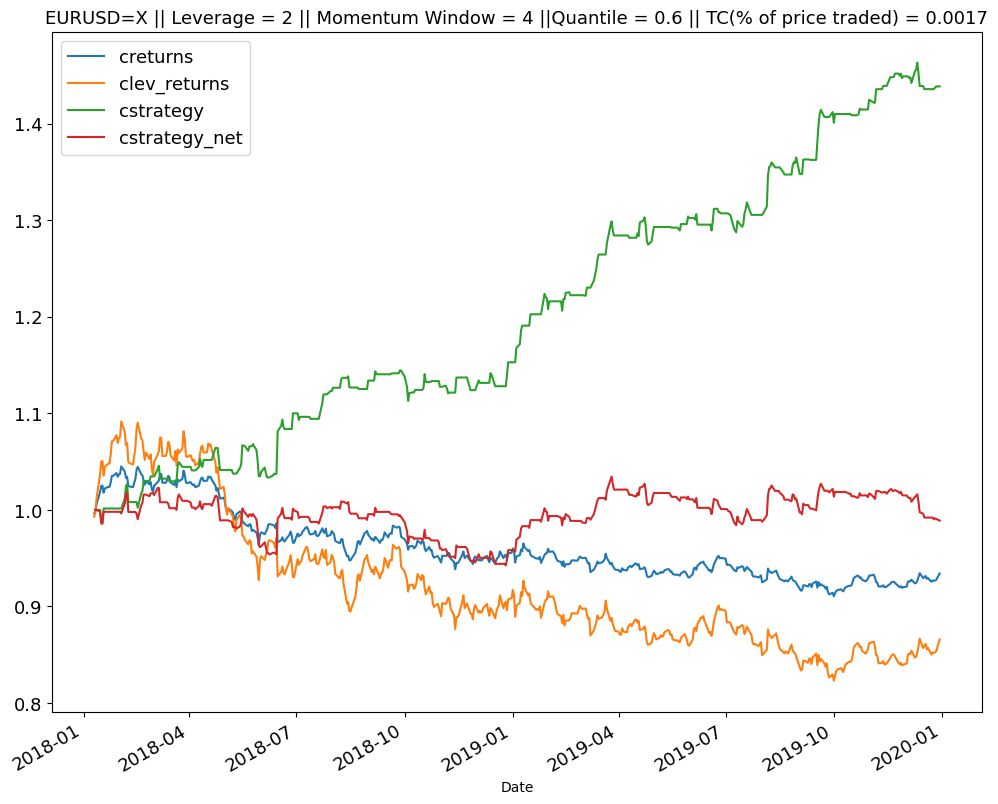

In [28]:
tester.plot_data()

In [29]:
tester.result.trades.value_counts()

trades
0.0    325
1.0    157
2.0     31
Name: count, dtype: int64

In [30]:
tester.optimisation_results.nlargest(10,columns="performance")

,Window,Quantile_Window,Quantile,Leverage,performance
720,4,7,0.60,2,1.7061
260,2,4,0.60,2,1.4861
700,4,6,0.60,2,1.4267
723,4,7,0.60,5,1.4225
328,2,7,0.76,2,1.4174
524,3,7,0.68,2,1.3924
284,2,5,0.68,2,1.3689
724,4,7,0.68,2,1.3688
308,2,6,0.76,2,1.3229
288,2,5,0.76,2,1.3208


## In & Outsample testing

In [20]:
train = BT("EURUSD=X", start="2017-01-01", end = "2019-12-31", window = 5,quantile_window=5, quantile=0.7, leverage=2)

[*********************100%%**********************]  1 of 1 completed


In [21]:
train

MomentumBT: EURUSD=X, window = 5,quantile_window =5, quantile = 0.7, leverage = 2

In [22]:
train.backtest()

Strategy Net performance: 0.9484 || Strategy outperformance vs Buy and Hold: -0.1059


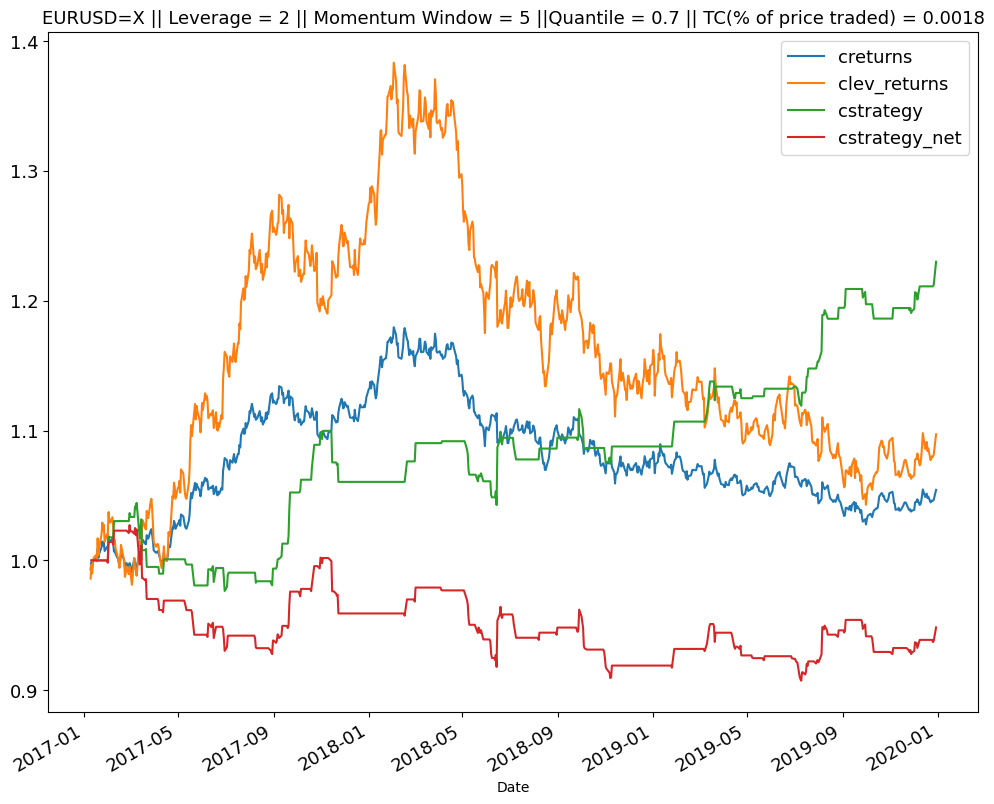

In [23]:
train.plot_data()

In [33]:
test = BT("EURUSD=X", start="2020-01-01", end = "2022-12-31", window = 9, quantile=0.65,leverage=1)

[*********************100%%**********************]  1 of 1 completed


In [34]:
print(test)

MomentumBT: EURUSD=X, window = 9,quantile_window =3, quantile = 0.65, leverage = 1


In [35]:
test.backtest()

Strategy Net performance: 0.5167 || Strategy outperformance vs Buy and Hold: -0.4422


/opt/anaconda3/envs/algotrade/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/opt/anaconda3/envs/algotrade/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/opt/anaconda3/envs/algotrade/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/opt/anaconda3/envs/algotrade/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B'

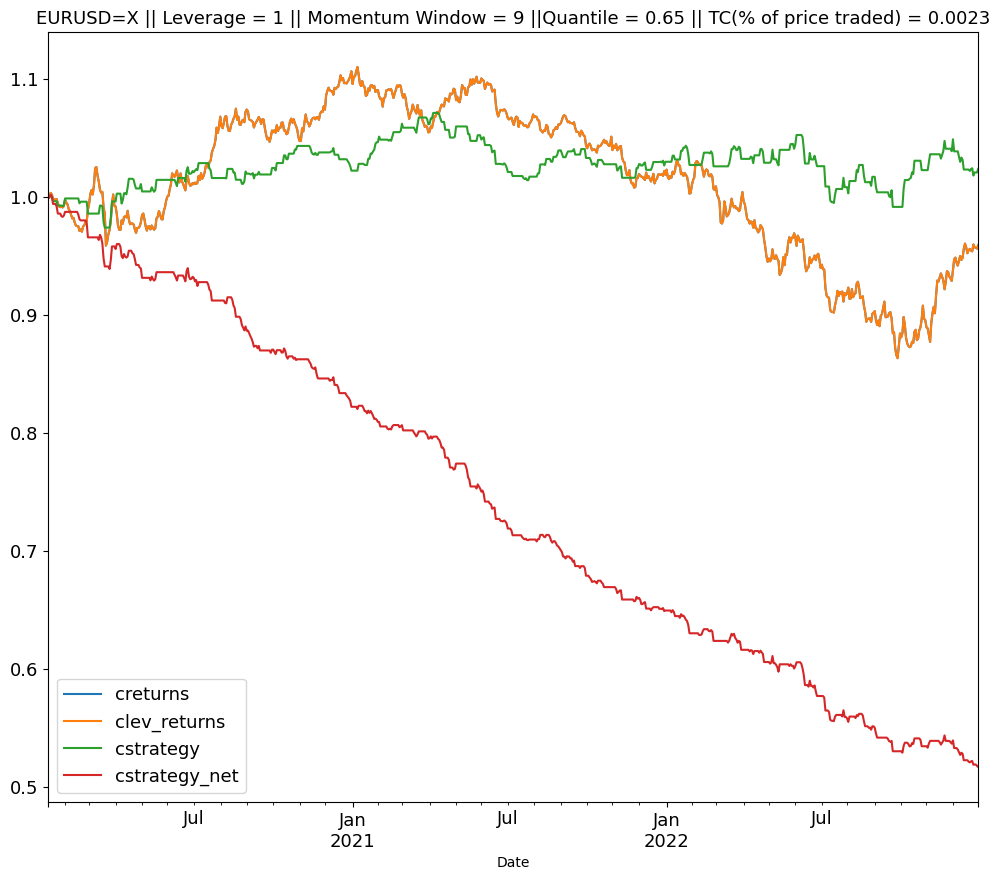

In [36]:
test.plot_data()